# Age and Level Descriptive Analysis: SMTO 2019

This notebook includes some descriptive analysis for the relationship between age and level in the SMTO 2019 dataset. The motivation for this investigation is to identify trends that might allow us to use age to predict institutition type (university vs college) and enrollment level (undergrad vs grad).

First, let's load the data.

In [1]:
import pandas as pd
cols = ['psinstitution', 'personstatusgrad ', 'personstatustime', 'psage']
df = pd.read_csv('../../Data/SMTO_2019/Respondents.csv', low_memory=False)[cols]
df['School_Type'] = df['psinstitution'].apply(lambda x: 'College' if 'College' in x else 'University')
df.head()

,psinstitution,personstatusgrad,personstatustime,psage,School_Type
0,Centennial College,NaN,NaN,26.0,College
1,Centennial College,NaN,NaN,25.0,College
2,Centennial College,NaN,NaN,19.0,College
3,Centennial College,NaN,NaN,25.0,College
4,Centennial College,NaN,NaN,97.0,College


Now, we make a column that contains three possible values: 'UG' if the student is an undergrad student at a university, 'Grad' if they are a grad student at a university, and 'College' if they are a college student.

In [2]:
def row_to_level(x):
    return x['personstatusgrad '] if isinstance(x['personstatusgrad '], str) else ("College" if x.School_Type == 'College' else None)
df['Level'] = df.apply(row_to_level, axis=1)

Now, let us plot the distribution of ages for each level.

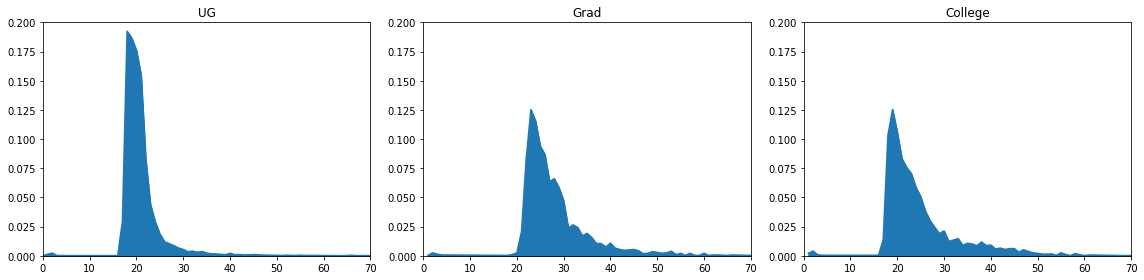

In [3]:
import matplotlib.pyplot as plt
plt.subplots(1, 3, figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.title('UG')
df[df['Level'] == 'UG']['psage'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])
plt.subplot(1, 3, 2)
plt.title('Grad')
df[df['Level'] == 'Grad']['psage'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])
plt.subplot(1, 3, 3)
plt.title('College')
df[df['Level'] == 'College']['psage'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])
plt.tight_layout()
plt.show()

Now, we plot the probability for each level for each age as a line plot, area plot, and stacked area plot.

In [4]:
xs = df['psage'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['psage'] == age]['Level'].value_counts(normalize=True)
    UGs.append(temp['UG'] if 'UG' in temp else 0)
    Grads.append(temp['Grad'] if 'Grad' in temp else 0)
    Colleges.append(temp['College'] if 'College' in temp else 0)

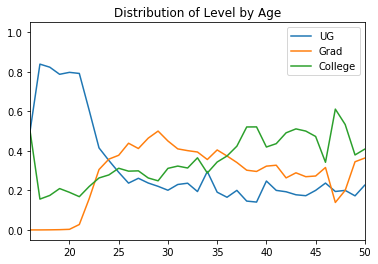

In [5]:
import matplotlib.pyplot as plt
plt.plot(xs, UGs)
plt.plot(xs, Grads)
plt.plot(xs, Colleges)
plt.xlim(16, 50)
plt.legend(labels=['UG', 'Grad', 'College'])
plt.title('Distribution of Level by Age')
plt.show()

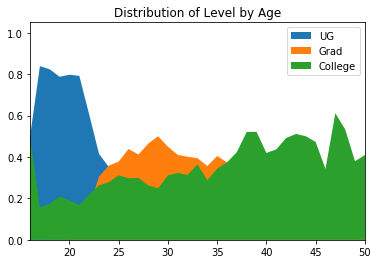

In [6]:
import matplotlib.pyplot as plt
plt.stackplot(xs, UGs)
plt.stackplot(xs, Grads)
plt.stackplot(xs, Colleges)
plt.xlim(16, 50)
plt.legend(labels=['UG', 'Grad', 'College'])
plt.title('Distribution of Level by Age')
plt.show()

In [7]:
xs = df['psage'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['psage'] == age]['Level'].value_counts(normalize=True)
    UG, Grad, College = temp['UG'] if 'UG' in temp else 0, temp['Grad'] if 'Grad' in temp else 0, temp['College'] if 'College' in temp else 0
    UGs.append(UG)
    Grads.append(UG + Grad)
    Colleges.append(UG + Grad + College)

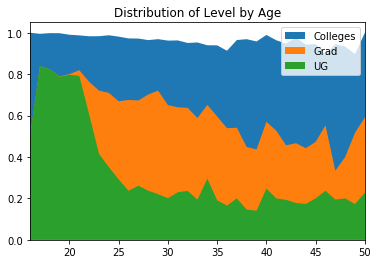

In [8]:
import matplotlib.pyplot as plt
plt.stackplot(xs, Colleges)
plt.stackplot(xs, Grads)
plt.stackplot(xs, UGs)
plt.xlim(16, 50)
plt.legend(labels=['Colleges', 'Grad', 'UG'])
plt.title('Distribution of Level by Age')
plt.show()

Finally, we show the the counts of students for each age in each level.

In [9]:
xs = df['psage'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['psage'] == age]['Level'].value_counts()
    UG, Grad, College = temp['UG'] if 'UG' in temp else 0, temp['Grad'] if 'Grad' in temp else 0, temp['College'] if 'College' in temp else 0
    UGs.append(UG)
    Grads.append(UG + Grad)
    Colleges.append(UG + Grad + College)

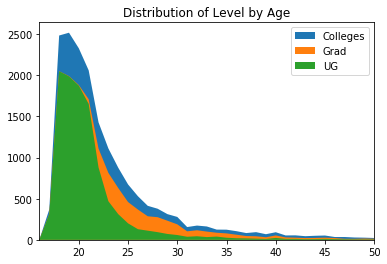

In [10]:
import matplotlib.pyplot as plt
plt.stackplot(xs, Colleges)
plt.stackplot(xs, Grads)
plt.stackplot(xs, UGs)
plt.xlim(16, 50)
plt.legend(labels=['Colleges', 'Grad', 'UG'])
plt.title('Distribution of Level by Age')
plt.show()